<a href="https://colab.research.google.com/github/Joshuaiwuoha/Lekki-webscraping/blob/main/Lekki_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Import**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
#import the scraped dataset
lek_rental = pd.read_csv('/content/lekki rentals (2)')
lek_sales = pd.read_csv('/content/lekki_sales')

# Data cleaning


In [ ]:
lek_rental.head()

,location,apartment_type,baths,toilets,status,last_updated,price
0,"65 Ajiran Road, Agungi Lekki Lagos",Lovely 4 Bedroom Terrace Duplex With Bq,1 baths,2 Toilets,Serviced,"Updated 19 Sep 2023, Added 04 Sep 2023",10000000
1,Lekki Phase 1 Lekki Lagos,1 Ensuite Room In A Shared Apartment,5 baths,5 Toilets,"Serviced,Newly Built",Added 21 Sep 2023,900000
2,"Van Daniels Estate Orchid, Chevron Lekki Lagos",Luxury 4 Bedroom Detached Duplex + Bq,1 baths,1 Toilets,Newly Built,"Updated 21 Sep 2023, Added 12 Sep 2023",8500000
3,"Chevron Toll Gate, Chevron Lekki Lagos",Luxury 4 Bedroom Semi Detached Duplex With Bq,4 baths,5 Toilets,"Serviced,Newly Built","Updated 21 Sep 2023, Added 08 Aug 2023",12000000
4,Lekki Phase 1 Lekki Lagos,Luxury 4 Bedroom Semi Detached Duplex,4 baths,5 Toilets,"Serviced,Newly Built","Updated 21 Sep 2023, Added 14 Jul 2023",6000000


In [ ]:
lek_sales.head()

,location,apartment_type,status,last_updated,price
0,Lekki Lagos,4 Bedroom Terrace Duplex,Newly Built,"Updated 24 Sep 2023, Added 09 Dec 2022",125000000
1,Chevron Lekki Lagos,Land Measuring 800sqm,Newly Built,"Updated 26 Sep 2023, Added 21 Sep 2023",340000000
2,Cowrie Creek Estate Lekki Lagos,Detached 5 Bedroom Duplex (carcass),NaN,Added 26 Sep 2023,250000000
3,Pinnock Beach Estate Jakande Lekki Lagos,4 Bedroom Semi Detached Duplex,Serviced,"Updated 26 Sep 2023, Added 09 Aug 2023",300000000
4,Osapa London Lekki Lagos,Residential Land,Serviced,"Updated 26 Sep 2023, Added 11 Aug 2023",450000


In [ ]:
#check for missing data
def missing(data):
  data.isnull().sum().plot(kind = 'bar')
  plt.show()

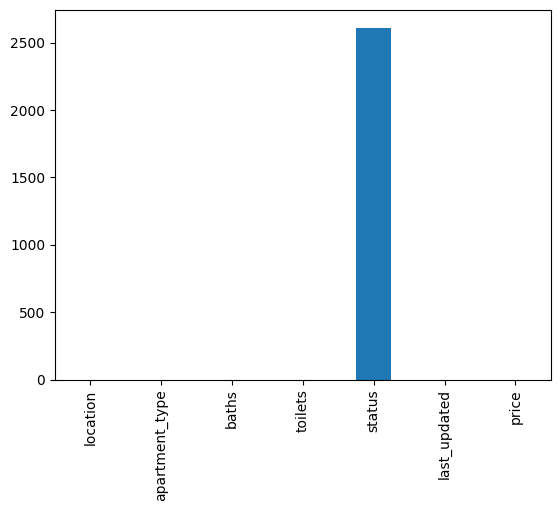

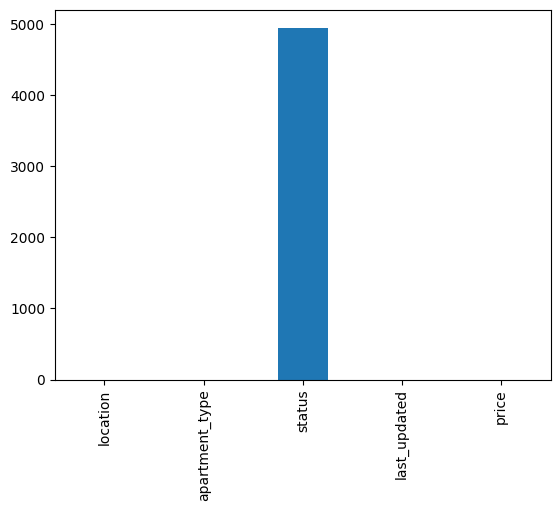

(None, None)

In [ ]:
missing(lek_rental), missing(lek_sales)

In [ ]:
#check for the number of unique values for all columns
lek_rental.nunique(), lek_sales.nunique()

(location            19
 apartment_type      24
 baths               11
 toilets             11
 status               9
 last_updated      3128
 price              120
 dtype: int64,
 location            29
 apartment_type      32
 status               9
 last_updated      8245
 price              289
 dtype: int64)

In [ ]:
#check for duplicates
lek_rental.drop_duplicates(inplace = True)
lek_sales.drop_duplicates(inplace = True)

In [ ]:
#standardised list of location names
loc = ['Agungi','Ajiran','Along Lekki Expressway','Chevron','Idado','Igbo Efon','Orchid'	,'Ikate'	,'Ikota','Ilasan'	,'Jakande'	,'Lekki Phase 1','Lekki Phase 2'	,'Nicon Town'	,'Ologolo'	,'Oral Estate'	,'Osapa London'	,'Vgc']

In [ ]:
#function to standardise the values in the location column
def standardize(df):
  for each in loc:
    df['location'] = df['location'].apply(lambda x: each if each in x.split(' ') else x)
    df['location'] = df['location'].apply(lambda x: each if each in x.split(',') else x)

In [ ]:
standardize(lek_rental)
standardize(lek_sales)

In [ ]:
#taking care of a few more extra cases
lek_rental['location'] = lek_rental['location'].apply(lambda x: 'Lekki Phase 1' if '1' in str(x) else x)
lek_rental['location'] = lek_rental['location'].apply(lambda x: 'Lekki Phase 2' if '2' in str(x) else x)

In [ ]:
# too many different location names and to simplify the process a bit, i decided to drop some locations with very few values(precisely those with less than 7)
lek_rental = lek_rental[lek_rental.location.isin(list(lek_rental.location.value_counts()[lek_rental.location.value_counts()> 7].index))]
lek_sales = lek_sales[lek_sales.location.isin(list(lek_sales.location.value_counts()[lek_sales.location.value_counts()> 7].index))]

In [ ]:
# ads for other locations were also scrapped and so i drop them using the drop fuction
lek_sales = lek_sales[~lek_sales.location.str.contains('Ikoyi|Abuja', case = False)]

In [ ]:
# ads for other locations were also scrapped and so i drop them using the drop fuction
lek_rental = lek_rental[~lek_rental.location.str.contains('ikoyi', case = False)]

In [ ]:
# created a function that will use mapping to try to stadardise the values in the location column
def standardize_location_with_mapping(location):
    mapping = {
                'Chevron': 'Chevron',
        'Osapa London': 'Osapa London',
        'Second Tollgate': 'Second Tollgate',
        '2nd Toll Gate': 'Second Tollgate',
        '2nd Tollgate Lekki Lagos': 'Second Tollgate',
        'Agungi': 'Agungi',
        'Idado': 'Idado',
        'Orchid': 'Orchid',
        'Ologolo': 'Ologolo',
        'Ilasan': 'Ilasan',
        'Ikate': 'Ikate',
        'Ikota': 'Ikota',
        'Lekki Phase 1': 'Lekki Phase 1',
        'Phase 1, Lekki Lagos': 'Lekki Phase 1',
        'Lekki Phase 2': 'Lekki Phase 2',
        'Vgc': 'Vgc',
        'Nicon Town': 'Nicon Town',
        'Megamound': 'Megamound',
        'Victory Park Estate': 'Victory Park Estate',
        'Victory Park': 'Victory Park Estate',
        'Igbo Efon': 'Igbo Efon',
        'Lekki County': 'Lekki County',
        'Oral Estate': 'Oral Estate',
        'Pinnock Beach Estate': 'Pinnock Beach Estate',
        'Brains And Hammers Estate': 'Brains And Hammers Estate',
        'Off Admiralty Way': 'Off Admiralty Way',
        'Admiralty Way': 'Admiralty Way',
        'Off Admiralty Road': 'Off Admiralty Way',
        'Off Freedom Way': 'Off Freedom Way',
        'Freedom Way': 'Freedom Way',
        'Goodluck Babatunde Way': 'Goodluck Babatunde Way',
        'Along Lekki Expressway': 'Along Lekki Expressway',
        'Life Camp': 'Life Camp',
        'Westend Estate': 'Westend Estate'
    }

    for key, value in mapping.items():
        if key.lower() in location.lower():
            return value

    return location



In [ ]:

locations = lek_sales.location

# standardize using mapping dictionary
final_standardized_locations = [standardize_location_with_mapping(loc) for loc in locations]



In [ ]:
#assigning the results of the mapping function to the location column
lek_sales['location'] = final_standardized_locations

In [ ]:
# to take a look at the results to see if i was able to standardise the column reasonably
lek_rental.location.value_counts().head(60),lek_sales.location.value_counts().head(60)

In [ ]:
# created a function that standardise the apartment_type column
def apartment_setup(df):
    for i in range(1, 8):
        df['apartment_type'] = df['apartment_type'].apply(lambda x: transform_apartment_type(x, i))

def transform_apartment_type(x, i):
    if 'Maisonette' in x.split(' '):
        return f'{i} Bedroom Maisonette'
    elif 'Penthouse' in x.split(' '):
        return f'{i} Bedroom Penthouse'
    elif 'Mini' in x.split(' ') and 'Flat' in x.split(' '):
        return '1 Bedroom Flat'
    elif 'Shared' in x.split(' ') or 'One' in x.split(' '):
        return '1 Bedroom Flat'
    elif f'{i}' in x and 'Detached' in x and 'Duplex' in x and 'Bq' in x:
        return f'{i} Bedroom Detached Duplex (BQ)'
    elif f'{i}' in x and 'Detached' in x and 'Duplex' in x and 'Bq' not in x:
        return f'{i} Bedroom Detached Duplex'
    elif f'{i}' in x and ('Terrace' in x or 'Terraced' in x) and 'Duplex' in x and 'Bq' in x:
        return f'{i} Bedroom Terrace Duplex (Bq)'
    elif f'{i}' in x and ('Terrace' in x or 'Terraced' in x) and 'Duplex' in x and 'Bq' not in x:
        return f'{i} Bedroom Terrace Duplex'
    elif f'{i}' in x and ('Semi' in x or 'Detached' in x) and 'Duplex' in x and 'Bq' in x:
        return f'{i} Bedroom Semi Detached Duplex (Bq)'
    elif f'{i}' in x and ('Semi' in x or 'Detached' in x) and 'Duplex' in x and 'Bq' not in x:
        return f'{i} Bedroom Semi Detached Duplex'
    elif f'{i}' in x and 'Bedroom' in x and ('Apartment' in x or 'Flat' in x or 'Mini' in x):
        return f'{i} Bedroom Flat'
    elif f'{i}' in x and 'Bedroom' in x and 'Duplex' in x and 'Detached' not in x and 'Terraced' not in x and 'Terrace' not in x:
        return f'{i} Bedroom Duplex'
    elif 'Studio' in x.split(' ') or 'self' in x.split(' ') or 'Contain' in x.split(' ') or 'Contained' in x.split(' '):
        return 'Self contain'
    else:
        return x


In [ ]:
# crearing a copy of both datasets
lek_rental = lek_rental.copy()
lek_sales = lek_sales.copy()

In [ ]:
#applying the function to standardise the apartment_type column
apartment_setup(lek_rental)
apartment_setup(lek_sales)

In [ ]:
# filter out the occurence of land in the dataset as i want to focus on only aparments
lek_sales = lek_sales[~lek_sales['apartment_type'].str.contains(r'\bland\b', case=False, na = False)]
lek_rental = lek_rental[~lek_rental['apartment_type'].str.contains(r'\bland\b', case = False, na = False)]

In [ ]:
# too many different apartment names and to simplify the process a bit, i decided to drop some locations with very few values(precisely those with less than 10)
lek_sales = lek_sales[lek_sales['apartment_type'].isin(list(lek_sales['apartment_type'].value_counts()[lek_sales['apartment_type'].value_counts()>10].index))]
lek_rental = lek_rental[lek_rental['apartment_type'].isin(list(lek_rental['apartment_type'].value_counts()[lek_rental['apartment_type'].value_counts()>10].index))]


In [ ]:
#return the number of unique values for the apartment column
lek_rental.apartment_type.nunique(), lek_sales.apartment_type.nunique()

(25, 34)

In [ ]:
#also drop occurences of hotel spaces and shop spaces
lek_sales.drop(index = lek_sales[(lek_sales.apartment_type == 'Hotel Space') | (lek_sales.apartment_type == 'Shop Space')].index, inplace = True)

In [ ]:
#also drop occurences of hotel spaces and shop spaces
lek_rental.drop(index = lek_rental[(lek_rental.apartment_type == 'Hotel Space') | (lek_rental.apartment_type == 'Shop Space')].index, inplace = True)

# Analysis

In [ ]:
lek_rental.describe(), lek_sales.describe()

(              price
 count  5.127000e+03
 mean   6.460277e+06
 std    8.441585e+07
 min    3.500000e+04
 25%    2.500000e+06
 50%    4.000000e+06
 75%    6.000000e+06
 max    6.000000e+09,
               price
 count  1.357700e+04
 mean   1.763201e+08
 std    1.166952e+09
 min    0.000000e+00
 25%    7.500000e+07
 50%    1.200000e+08
 75%    2.000000e+08
 max    1.350000e+11)

In [ ]:
def box(dfs):
  sns.boxplot(x = dfs['price'])
  plt.show()

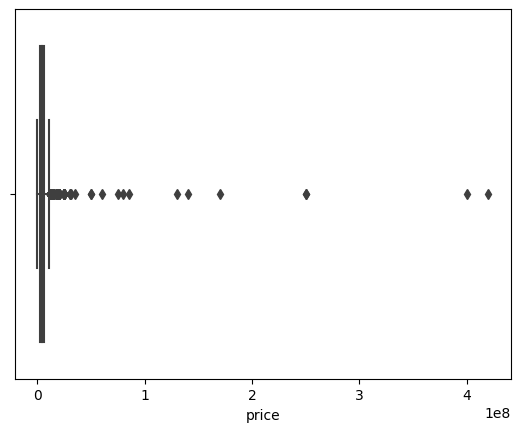

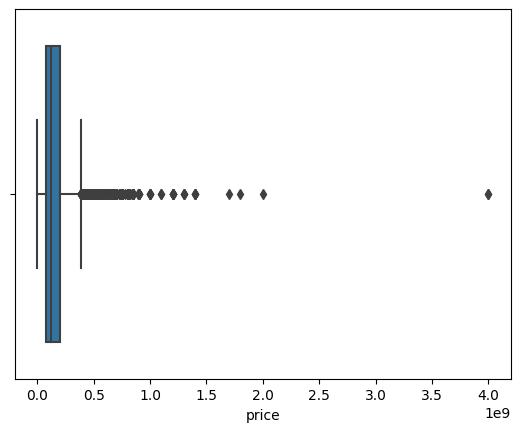

(None, None)

In [ ]:
# quick check for outliers
box(lek_rental),box(lek_sales)

In [ ]:
lek_sales = lek_sales.query('price < 120000000000')

In [ ]:
lek_rental = lek_rental.query('price < 5000000000')

<Axes: xlabel='price', ylabel='Count'>

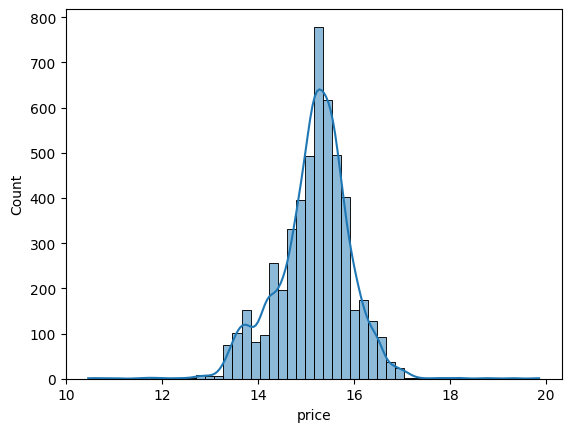

In [ ]:
sns.histplot(x = np.log(lek_rental.price), kde = True, bins = 50)

In [ ]:
lek_rental.shape, lek_sales.shape

((5126, 7), (13576, 5))

In [ ]:
lek_rental.to_csv('Lekki_main_rentals', index = False)
lek_sales.to_csv('Lekki_main_sales', index = False)
